In [1]:
from dl1_data_handler.reader import DLWaveformReader, DLDataReader, TableQualityQuery, DLRawTriggerReader
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import EventSource
from ctapipe.visualization import CameraDisplay
from ctapipe.core.traits import List
from ctapipe.core import QualityQuery
import time
from pathlib import Path

In [4]:
import warnings
warnings.simplefilter("ignore")

outputs = ["waveform", "random_patch", "balanced_patches", "hot_patch", "all_patches", "double_random"]
file = ["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"]

for outs in outputs:
    print(f"Initialisation time for {outs} is:")
    %timeit reader = DLRawTriggerReader(input_url_signal=file,image_mapper_type="ShiftingMapper",mode = "mono",sequence_position= "maximum",output_settings = outs,hot_pixel_from_simulation = True,trigger_settings = {"number_of_trigger_patches" : 7,"cpe_threshold" : 0, "interleave_patches" : True},sequence_length = 10,allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],allowed_tels = [1],quality_cuts = False)
    reader = DLRawTriggerReader(input_url_signal=file,image_mapper_type="ShiftingMapper",mode = "mono",sequence_position= "maximum",output_settings = outs,hot_pixel_from_simulation = True,trigger_settings = {"number_of_trigger_patches" : 7,"cpe_threshold" : 0, "interleave_patches" : True},sequence_length = 10,allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],allowed_tels = [1],quality_cuts = False)
    for i in [4,5,6]:
        print(f"Batch generation time for {outs}, for a {i} * 49 batch size is:")
        %timeit reader.generate_mono_batch(batch_indices = list(np.arange(49*i)))


Initialisation time for waveform is:
1.14 s ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for waveform, for a 4 * 49 batch size is:
644 ms ± 5.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for waveform, for a 5 * 49 batch size is:
827 ms ± 7.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for waveform, for a 6 * 49 batch size is:
1.01 s ± 7.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Initialisation time for random_patch is:
1.29 s ± 2.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for random_patch, for a 4 * 49 batch size is:
768 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for random_patch, for a 5 * 49 batch size is:
971 ms ± 6.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for random_patch, for a 6 * 49 batch size is:
1.17 s ± 4.67 ms per loop (mean ± std. dev. of 7 ru

In [21]:
import warnings
from astropy.table import Table
warnings.simplefilter("ignore")
names = []
init = []
batch4 = []
batch5 = []
batch6 = []
out_lengths = []
outputs = ["waveform", "random_patch", "balanced_patches", "hot_patch", "all_patches", "double_random"]
file = ["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"]

for outs in outputs:
    print(f"Initialisation time for {outs} is:")
    names.append(outs)
    time =%timeit -o DLRawTriggerReader(input_url_signal=file,image_mapper_type="ShiftingMapper",mode = "mono",sequence_position= "maximum",output_settings = outs,hot_pixel_from_simulation = True,trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : True},sequence_length = 10,allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],allowed_tels = [1],quality_cuts = False)
    mean_time = np.mean(time.all_runs)
    init.append(mean_time)
    reader = DLRawTriggerReader(input_url_signal=file,image_mapper_type="ShiftingMapper",mode = "mono",sequence_position= "maximum",output_settings = outs,hot_pixel_from_simulation = True,trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : True},sequence_length = 10,allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],allowed_tels = [1],quality_cuts = False)
    out_length = len(reader.example_identifiers)
    out_lengths.append(out_length)
    for i, batch_list in zip([4,5,6], [batch4, batch5, batch6]):
        print(f"Batch generation time for {outs}, for a {i} * 49 batch size is:")
        time = %timeit -o reader.generate_mono_batch(batch_indices = list(np.arange(49*i)))
        mean_time = np.mean(time.all_runs)
        batch_list.append(mean_time)

table = Table([names, out_lengths, init, batch4, batch5, batch6], names=("output_setting", "identifiers_length", "initialisation_time", "batch_4", "batch_5","batch_6"))
table.write("results.csv", format="csv", overwrite=True)

Initialisation time for waveform is:
1.14 s ± 8.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for waveform, for a 4 * 49 batch size is:
639 ms ± 5.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for waveform, for a 5 * 49 batch size is:
799 ms ± 6.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for waveform, for a 6 * 49 batch size is:
987 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Initialisation time for random_patch is:
1.22 s ± 4.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for random_patch, for a 4 * 49 batch size is:
734 ms ± 6.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for random_patch, for a 5 * 49 batch size is:
930 ms ± 6.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Batch generation time for random_patch, for a 6 * 49 batch size is:
1.14 s ± 12.5 ms per loop (mean ± std. dev. of 7 r

In [26]:
from astropy import units as u

table["init_time"].unit = u.s
table["batch_4"].unit = u.s
table["batch_5"].unit = u.s
table["batch_6"].unit = u.s


In [23]:
for col in ["init_time", "batch_4", "batch_5", "batch_6"]:
    table[col] = np.round(table[col], 3)

In [27]:
table

output_setting,identifiers_length,init_time,batch_4,batch_5,batch_6
,,s,s,s,s
str16,int64,float64,float64,float64,float64
waveform,11044,1.142,0.639,0.799,0.987
random_patch,11044,1.216,0.734,0.93,1.139
balanced_patches,266209,7.176,0.303,0.381,0.461
hot_patch,11044,1.355,0.778,0.976,1.172
all_patches,541156,1.393,0.306,0.384,0.464
double_random,22088,1.39,0.577,0.729,0.856


In [16]:
table.write("times.csv", format="csv", overwrite=True)

In [6]:
%%timeit

reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/trigerless_gammas/reduced_ctapipe/corsika_run1.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum", 
                              output_settings = "hot_patch",
                              hot_pixel_from_simulation = True,
                              trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : False},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

1.12 s ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit reader.generate_mono_batch(batch_indices = list(np.arange(49*3)))

213 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
reader.generate_mono_batch(batch_indices = list(np.arange(50)))

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,features,cherenkov_pe,true_energy,true_alt,true_az,true_shower_primary_id,telescope_pointing_azimuth,telescope_pointing_altitude,cam_coord_offset_x,cam_coord_offset_y,cam_coord_distance,pointing_altitude,pointing_azimuth,fov_lon,fov_lat,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,,,TeV,deg,deg,,rad,rad,m,m,m,rad,rad,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,"float32[28,28,10]",int64,float64,float64,float64,int64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float64,int64
0,0,0,1,0,502,1,294.0 .. 298.0,74,0.010171852074563503,70.8581309781398,181.60217614294456,0,3.1415927,1.2217305,0.4227355661326657,0.25674130378849946,0.49459221177099416,1.2217305,3.1415927,0.525364040491684,0.8650344210526874,1.012062721931632,-1.9925999642324606,1
1,0,1,1,0,1903,1,290.0 .. 300.0,49,0.0323750302195549,69.25027029657295,186.42116147033371,0,3.1415927,1.2217305,-0.30790411013018615,1.1097723374083772,1.1516942224010307,1.2217305,3.1415927,2.270902541209585,-0.6300573573282486,2.3566422580210893,-1.4897898175306203,1
2,0,2,1,0,3101,1,0.0 .. 314.0,41,0.3737192451953888,67.79137604080408,180.21307959030406,0,3.1415927,1.2217305,-1.0792681371659878,0.039387450674590055,1.079986612496833,1.2217305,3.1415927,0.08059766747977562,-2.208482472234197,2.2099519444395197,-0.42745453697254265,1
3,0,3,1,0,3305,1,299.0 .. 311.0,44,0.015845729038119316,69.0996782857525,185.95937238054913,0,3.1415927,1.2217305,-0.38924800953581734,1.0374073443327192,1.1080288854551856,1.2217305,3.1415927,2.122823659504991,-0.7965095760810841,2.2672709291791677,-1.800087774779224,1
4,0,4,1,0,3307,1,0.0 .. 0.0,33,0.015845729038119316,69.0996782857525,185.95937238054913,0,3.1415927,1.2217305,-0.38924800953581734,1.0374073443327192,1.1080288854551856,1.2217305,3.1415927,2.122823659504991,-0.7965095760810841,2.2672709291791677,-1.800087774779224,1
5,0,5,1,0,3700,1,316.0 .. 289.0,145,0.1309148669242859,69.31930301851428,171.15997803415397,0,3.1415927,1.2217305,-0.2222668099460944,-1.5204173391842597,1.536577827542672,1.2217305,3.1415927,-3.11119630834888,-0.4548196477052714,3.1442328200134004,-0.8830110313976508,1
6,0,6,1,0,3701,1,295.0 .. 293.0,82,0.1309148669242859,69.31930301851428,171.15997803415397,0,3.1415927,1.2217305,-0.2222668099460944,-1.5204173391842597,1.536577827542672,1.2217305,3.1415927,-3.11119630834888,-0.4548196477052714,3.1442328200134004,-0.8830110313976508,1
7,0,7,1,0,5900,1,0.0 .. 288.0,11,0.03297586739063263,70.03329684340156,180.41779402010766,0,3.1415927,1.2217305,0.016511086812339367,0.06971828905813392,0.07164674324013705,1.2217305,3.1415927,0.1426629899251493,0.033786271054327056,0.14660913493570701,-1.481803772036002,1


In [36]:
reader.example_identifiers

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,true_energy,true_alt,true_az,true_shower_primary_id,telescope_pointing_azimuth,telescope_pointing_altitude,cam_coord_offset_x,cam_coord_offset_y,cam_coord_distance,pointing_altitude,pointing_azimuth,fov_lon,fov_lat,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,TeV,deg,deg,,rad,rad,m,m,m,rad,rad,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,float64,float64,float64,int64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float64,int64
0,0,0,1,0,502,1,0.010171852074563503,70.8581309781398,181.60217614294456,0,3.1415927,1.2217305,0.4227355661326657,0.25674130378849946,0.49459221177099416,1.2217305,3.1415927,0.525364040491684,0.8650344210526874,1.012062721931632,-1.9925999642324606,1
1,0,1,1,0,1903,1,0.0323750302195549,69.25027029657295,186.42116147033371,0,3.1415927,1.2217305,-0.30790411013018615,1.1097723374083772,1.1516942224010307,1.2217305,3.1415927,2.270902541209585,-0.6300573573282486,2.3566422580210893,-1.4897898175306203,1
2,0,2,1,0,3101,1,0.3737192451953888,67.79137604080408,180.21307959030406,0,3.1415927,1.2217305,-1.0792681371659878,0.039387450674590055,1.079986612496833,1.2217305,3.1415927,0.08059766747977562,-2.208482472234197,2.2099519444395197,-0.42745453697254265,1
3,0,3,1,0,3305,1,0.015845729038119316,69.0996782857525,185.95937238054913,0,3.1415927,1.2217305,-0.38924800953581734,1.0374073443327192,1.1080288854551856,1.2217305,3.1415927,2.122823659504991,-0.7965095760810841,2.2672709291791677,-1.800087774779224,1
4,0,4,1,0,3307,1,0.015845729038119316,69.0996782857525,185.95937238054913,0,3.1415927,1.2217305,-0.38924800953581734,1.0374073443327192,1.1080288854551856,1.2217305,3.1415927,2.122823659504991,-0.7965095760810841,2.2672709291791677,-1.800087774779224,1
5,0,5,1,0,3700,1,0.1309148669242859,69.31930301851428,171.15997803415397,0,3.1415927,1.2217305,-0.2222668099460944,-1.5204173391842597,1.536577827542672,1.2217305,3.1415927,-3.11119630834888,-0.4548196477052714,3.1442328200134004,-0.8830110313976508,1
6,0,6,1,0,3701,1,0.1309148669242859,69.31930301851428,171.15997803415397,0,3.1415927,1.2217305,-0.2222668099460944,-1.5204173391842597,1.536577827542672,1.2217305,3.1415927,-3.11119630834888,-0.4548196477052714,3.1442328200134004,-0.8830110313976508,1
7,0,7,1,0,5900,1,0.03297586739063263,70.03329684340156,180.41779402010766,0,3.1415927,1.2217305,0.016511086812339367,0.06971828905813392,0.07164674324013705,1.2217305,3.1415927,0.1426629899251493,0.033786271054327056,0.14660913493570701,-1.481803772036002,1


In [8]:
reader.trigger_settings

{'number_of_trigger_patches': 7,
 'nsb_threshold': 0,
 'interleave_patches': True,
 'trigger_patch_size': [np.int64(28), np.int64(28)],
 'trigger_patches': [{'x': np.int64(14), 'y': np.int64(14)},
  {'x': np.int64(14), 'y': np.int64(29)},
  {'x': np.int64(14), 'y': np.int64(43)},
  {'x': np.int64(14), 'y': np.int64(58)},
  {'x': np.int64(14), 'y': np.int64(73)},
  {'x': np.int64(14), 'y': np.int64(87)},
  {'x': np.int64(14), 'y': np.int64(102)},
  {'x': np.int64(29), 'y': np.int64(14)},
  {'x': np.int64(29), 'y': np.int64(29)},
  {'x': np.int64(29), 'y': np.int64(43)},
  {'x': np.int64(29), 'y': np.int64(58)},
  {'x': np.int64(29), 'y': np.int64(73)},
  {'x': np.int64(29), 'y': np.int64(87)},
  {'x': np.int64(29), 'y': np.int64(102)},
  {'x': np.int64(43), 'y': np.int64(14)},
  {'x': np.int64(43), 'y': np.int64(29)},
  {'x': np.int64(43), 'y': np.int64(43)},
  {'x': np.int64(43), 'y': np.int64(58)},
  {'x': np.int64(43), 'y': np.int64(73)},
  {'x': np.int64(43), 'y': np.int64(87)},
  {

In [12]:
import numpy as np

true_sums = np.array([10, 20, 30, 40, 50, 60, 70])
temp_index = np.array([4, 1, 5])  # Randomly selected patches

cherenkov = []
cherenkov.extend(true_sums[temp_index].tolist())

print(cherenkov)  # Output: [50, 20, 60]


[50, 20, 60]


In [5]:
%timeit reader.generate_mono_batch(batch_indices = list(np.arange(10000)))

28.8 s ± 687 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
reader.generate_mono_batch(batch_indices = list(np.arange(40)))

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,features,cherenkov_pe,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class,cosmic_nsb
,,,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,,
int64,int64,int64,int32,int64,int64,int64,"float32[28,28,10]",int64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64
0,0,0,1,0,502,1,295.0 .. 297.0,18,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,0
1,0,0,1,0,502,1,0.0 .. 0.0,0,0.010171852074563503,70.8581309781398,181.60217614294456,0,0.525364040491684,0.8650344210526874,1.0120627219315363,-1.9925999642324606,1,1
2,0,1,1,0,1903,1,0.0 .. 288.0,2,0.0323750302195549,69.25027029657295,186.42116147033371,0,2.270902541209585,-0.6300573573282486,2.356642258017365,-1.4897898175306203,1,0
3,0,1,1,0,1903,1,0.0 .. 0.0,0,0.0323750302195549,69.25027029657295,186.42116147033371,0,2.270902541209585,-0.6300573573282486,2.356642258017365,-1.4897898175306203,1,1
4,0,2,1,0,3101,1,0.0 .. 0.0,2,0.3737192451953888,67.79137604080408,180.21307959030406,0,0.08059766747977562,-2.208482472234197,2.209951944437672,-0.42745453697254265,1,0
5,0,2,1,0,3101,1,302.0 .. 300.0,0,0.3737192451953888,67.79137604080408,180.21307959030406,0,0.08059766747977562,-2.208482472234197,2.209951944437672,-0.42745453697254265,1,1
6,0,3,1,0,3305,1,299.0 .. 318.0,21,0.015845729038119316,69.0996782857525,185.95937238054913,0,2.122823659504991,-0.7965095760810841,2.267270929175359,-1.800087774779224,1,0
7,0,3,1,0,3305,1,311.0 .. 314.0,0,0.015845729038119316,69.0996782857525,185.95937238054913,0,2.122823659504991,-0.7965095760810841,2.267270929175359,-1.800087774779224,1,1


In [4]:
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum", 
                              output_settings = "all_patches",
                              hot_pixel_from_simulation = True,
                              trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : True},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

In [10]:
reader.example_identifiers

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,patch_index,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0,0,0,4,0,100,1,0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
1,0,0,4,0,100,1,1,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
2,0,0,4,0,100,1,2,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
3,0,0,4,0,100,1,3,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
4,0,0,4,0,100,1,4,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
5,0,0,4,0,100,1,5,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
6,0,0,4,0,100,1,6,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
7,0,0,4,0,100,1,7,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1


In [4]:
%%timeit
reader = DLRawTriggerReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/NSB_protons/reduced/NSB/corsika_run4.dl1b.h5"],
                              image_mapper_type  = "ShiftingMapper",
                              mode = "mono",
                              sequence_position= "maximum", 
                              output_settings = "all_patches",
                              hot_pixel_from_simulation = True,
                              trigger_settings = {"number_of_trigger_patches" : 7,"nsb_threshold" : 0, "interleave_patches" : True},
                              sequence_length = 10,
                              allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                              allowed_tels = [1],
                              quality_cuts = False)

1.15 s ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


9.77 s ± 277 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.1 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
30.3 s ± 427 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
40 s ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
49.9 s ± 84.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 1s ± 506 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 10s ± 681 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 20s ± 521 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


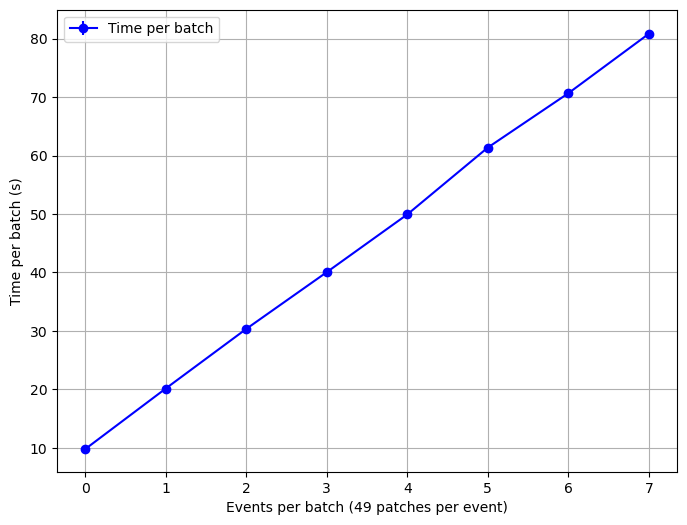

In [18]:
x = []
y = []
yerr = []  

for i in range(8):
    time = %timeit -o reader.generate_mono_batch(batch_indices=list(np.arange(49*(i+1))))
    mean_time = np.mean(time.all_runs)  
    stdev_time = np.std(time.all_runs)
    x.append(i)
    y.append(mean_time)  
    yerr.append(stdev_time) 

plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=yerr, fmt='-o', color='b', label='Time per batch')


plt.xlabel('Events per batch (49 patches per event)')
plt.ylabel('Time per batch (s)')

plt.grid(True)
plt.legend()
plt.show()